In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [2]:
data = datasets.fetch_openml(
 'mnist_784', 
 version=1, 
 return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

In [6]:
# 70000*（28*28）
pixel_values.shape

(70000, 784)

In [7]:
targets.shape

(70000,)

In [11]:
# 把pixel_values重塑为原形状
sigle_image = pixel_values[1,:].reshape(28,28)
# plt.imshow(sigle_image,cmap='gray')

In [21]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])
transformed_data.shape

(3000, 2)

In [23]:
# transformed_data.shape = (3000,2)
# targets[:3000] = (3000,)
# np.column_stack将多个numpy数组按照列的方式进行堆叠
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data,targets[:3000])),
    columns=["x", "y", "targets"]
)

# 转换数据类型
tsne_df.loc[:,"targets"] =tsne_df.targets.astype(int)

In [24]:
tsne_df

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9
...,...,...,...
2995,9.038110,58.850792,7
2996,-29.405334,-60.951775,0
2997,13.466378,47.369007,9
2998,-2.435752,7.983772,1


/home/q/baochengs/anaconda3/envs/sklearn/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


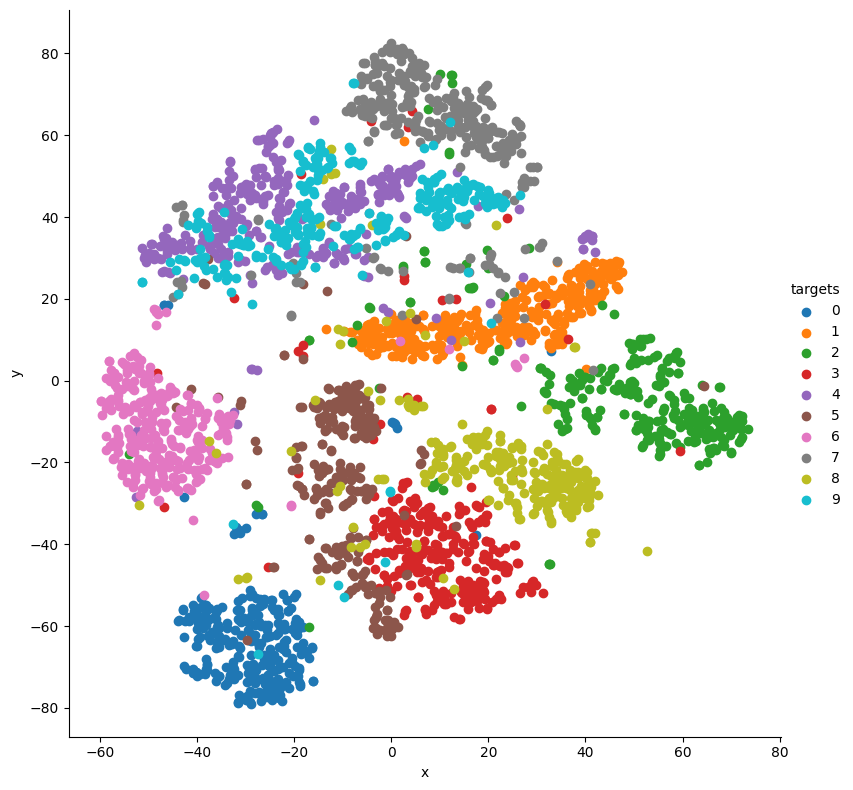

In [25]:
# 可视化无监督数据集
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()